# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random
import numpy as np
import pandas as pd
import re
import time
import matplotlib.pyplot as plt
import simpleaudio as sa
import math


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
#it was tottaly worth spending 20m in this
def rolldie(number):
    '''Pass the number of times you want to roll a 6 sided die'''
    faces = [1,2,3,4,5,6]
    memory = []
    sound=['Redneck.wav', "Normal.wav", "Normal.wav"]
    for i in range(number):
        print("Rolling the die...")
        result=random.choice(faces)
        memory.append(result)
        #filename = random.choice(sound)
        #wave_obj = sa.WaveObject.from_wave_file(filename)
        #play_obj = wave_obj.play()
        #play_obj.wait_done()
        print("Ohh! It's a ", result)
        time.sleep(1)
        print("Grabbing the die...")
        time.sleep(1)
    if number > 1:
        print("Your last ", number, "throws were", memory)
    return pd.DataFrame(memory, columns=['Results'])
    
    

    
    
    
memory=rolldie(10)

Rolling the die...
Ohh! It's a  4
Grabbing the die...
Rolling the die...
Ohh! It's a  6
Grabbing the die...
Rolling the die...
Ohh! It's a  3
Grabbing the die...
Rolling the die...
Ohh! It's a  3
Grabbing the die...
Rolling the die...
Ohh! It's a  2
Grabbing the die...
Rolling the die...
Ohh! It's a  3
Grabbing the die...
Rolling the die...
Ohh! It's a  5
Grabbing the die...
Rolling the die...
Ohh! It's a  1
Grabbing the die...
Rolling the die...
Ohh! It's a  3
Grabbing the die...
Rolling the die...
Ohh! It's a  4
Grabbing the die...
Your last  10 throws were [4, 6, 3, 3, 2, 3, 5, 1, 3, 4]


In [3]:
memory

,Results
0,4
1,6
2,3
3,3
4,2
5,3
6,5
7,1
8,3
9,4


In [4]:
memory = memory.sort_values(by=['Results'])
memory= memory.reset_index()
memory = memory.drop(['index'], axis=1)
memory

,Results
0,1
1,2
2,3
3,3
4,3
5,3
6,4
7,4
8,5
9,6


#### 2.- Plot the results sorted by value.

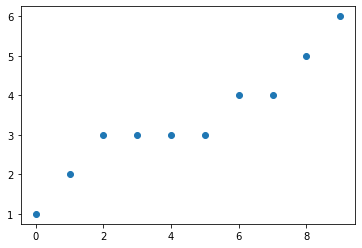

In [5]:
memory=memory.reset_index()
plt.scatter(x=memory['index'], y= memory['Results'])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

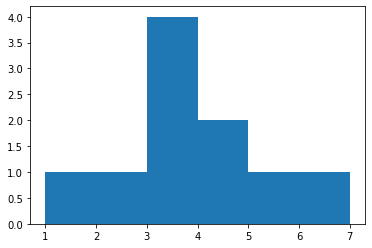

In [6]:
# your code here
plt.hist(memory['Results'], bins=[1, 2, 3, 4, 5, 6, 7])
plt.show()


#In the scatter plot we have the results for each throw! Results is displayed in the Y axis and the throw number is displayed in the X axis.

In [7]:
"""
In the scatter plot we have the results for each throw! Results is displayed in the Y axis and the throw number is displayed in the X axis.
While when we do a frequency distribution plot we display in the X axis the possbile output values and then we display in the Y axis the amount of times a certain ouput has appeared

"""

'\nIn the scatter plot we have the results for each throw! Results is displayed in the Y axis and the throw number is displayed in the X axis.\nWhile when we do a frequency distribution plot we display in the X axis the possbile output values and then we display in the Y axis the amount of times a certain ouput has appeared\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean_calc(dfcolumn):
    return sum(dfcolumn)/len(dfcolumn)

mean_calc(memory['Results'])

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

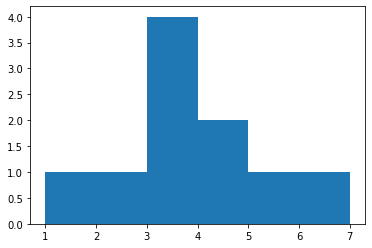

3.4

In [9]:
# your code here
plt.hist(memory['Results'], bins=[1, 2, 3, 4, 5, 6, 7])
plt.show()

mean_calc(memory['Results'])


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def median_calc(dfcolumn):
    dfcolumn=dfcolumn.sort_values()
    dfcolumn=dfcolumn.reset_index(drop=True)
    if len(dfcolumn) % 2 == 0:
        return (dfcolumn[(len(dfcolumn)/2)-1]+dfcolumn[len(dfcolumn)/2])/2
    else:
        return dfcolumn[math.floor(len(dfcolumn)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
memory['Results']

0    1
1    2
2    3
3    3
4    3
5    3
6    4
7    4
8    5
9    6
Name: Results, dtype: int64

In [12]:
# your code here
def quartiles_calc(dfcolumn):
    dfcolumn=dfcolumn.sort_values()
    dfcolumn=dfcolumn.reset_index(drop=True)
    if len(dfcolumn) % 2 == 0:
        median = (dfcolumn[(len(dfcolumn)/2)-1]+dfcolumn[len(dfcolumn)/2])/2
    else:
        median = dfcolumn[math.floor(len(dfcolumn)/2)]
    if len(dfcolumn) % 2 == 0:
        q1 = dfcolumn[math.floor(len(dfcolumn)*1/4)]
    else:
        q1 = (dfcolumn[math.floor(len(dfcolumn)*1/4)-1] + dfcolumn[math.floor(len(dfcolumn)*1/4)])/2
    if len(dfcolumn) % 2 == 0:
        q3 = dfcolumn[math.floor(len(dfcolumn)*3/4)]
    else:
        q3 = (dfcolumn[math.floor(len(dfcolumn)*3/4)-1] + dfcolumn[math.floor(len(dfcolumn)*3/4)])/2
    return q1, median, q3


In [13]:
#COMPARISON WITH METHOD
#q1 = np.quantile(memory['Results'], 0.25)
#print("the first quartile is", q1)
#q2 = np.quantile(memory['Results'], 0.50)
#print("the second quartile is",q2)
#q3 = np.quantile(memory['Results'], 0.75)
#print("the third quartile is", q3)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data = data.drop(columns=['Unnamed: 0'])
data=data.reset_index(drop=True)
data=data['value'].sort_values()

In [15]:
data=data.reset_index(drop=True)


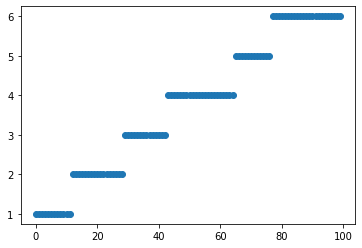

In [16]:
data=data.reset_index()
plt.scatter(x=data['index'], y= data['value'])
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here
# your code here
mean_calc(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


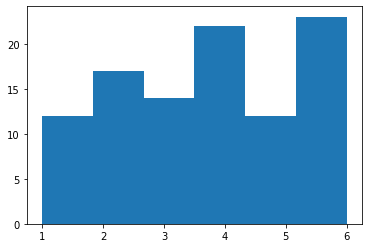

In [18]:
# your code here
plt.hist(data['value'], bins=6)
plt.show()

#With this plot we are able to see the number of times(AKA distribution frequency) of each result.

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [19]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [20]:
# your code here
data = pd.read_csv('../data/roll_the_dice_thousand.csv')
#data = data.drop(columns=['Unnamed: 0'])
#data=data['value'].sort_values()
#data=data.reset_index(drop=True)

In [21]:
data = data.drop(columns=['Unnamed: 0', 'roll'])
#data
data=data['value'].sort_values()
data=data.reset_index(drop=True)
data

0      1
1      1
2      1
3      1
4      1
      ..
995    6
996    6
997    6
998    6
999    6
Name: value, Length: 1000, dtype: int64

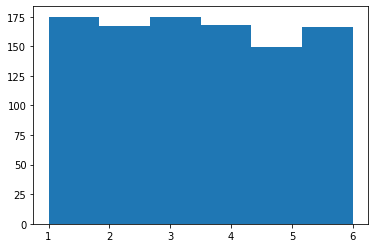

In [22]:
"""
your comments here
"""
plt.hist(data, bins=6)
plt.show()
#We can see that the more number of throws we make the better the distribution we get.
#The probability of each side is 1/6, as we increment the number of throws we are supposed to get "equally" number of results for each side of the dice


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [23]:
# your code here
data = pd.read_csv('../data/ages_population.csv')
data=data.sort_values(by='observation')
data=data.reset_index(drop=True)
data

,observation
0,1.0
1,1.0
2,2.0
3,2.0
4,4.0
...,...
995,69.0
996,70.0
997,71.0
998,73.0


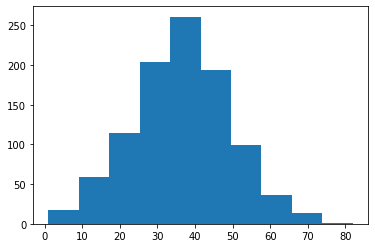

In [24]:
plt.hist(data['observation'])
plt.show()
#Try to guess the range in which the mean and the standard deviation will be by looking at the plot.¶
# Just by looking at the histogram below, I guess that the mean is near where we have the most high 
#frequency result, in this case it will be around 36-39, regarding the std deviation I will guess around 10, since each bar represent 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [25]:
# your code here
print(np.std(data['observation']))
print(np.mean(data['observation']))
#Close enough

12.810089773299797
36.56


In [26]:
"""
your comments here
"""
plot1=data['observation'].max()-data['observation'].min()

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

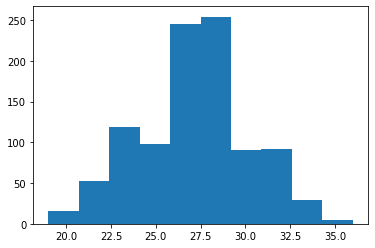

In [27]:
# your code here
data = pd.read_csv('../data/ages_population2.csv')
data=data.sort_values(by='observation')
data=data.reset_index(drop=True)
plt.hist(data['observation'])
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [28]:
"""
your comments here
Yes, we can find 2 very interesting bars right near the mean of the distribution
"""

'\nyour comments here\nYes, we can find 2 very interesting bars right near the mean of the distribution\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [29]:
# your code here
print(np.std(data['observation']))
print(np.mean(data['observation']))

2.9683286543103677
27.155


In [30]:
"""
your comments here

"""
print(plot1)
data['observation'].max()-data['observation'].min()
#we can see that the range is much bigger, therefore the std deviation is much bigger on plot1

81.0


17.0

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

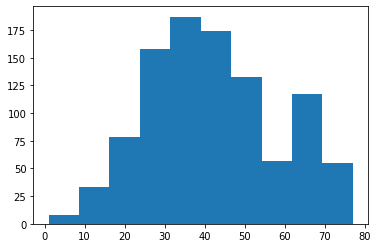

In [40]:
# your code here
data = pd.read_csv('../data/ages_population3.csv')
data=data.sort_values(by='observation')
data=data.reset_index(drop=True)
plt.hist(data['observation'])
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [41]:
# your code here
print(np.std(data['observation']))
print(np.mean(data['observation']))
#We have a high frequency in the bin 60-70 which means that the average of this distribution will grow and the std deviation too since the data is more dispersed

16.136631587788077
41.989


In [33]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [42]:
# your code here
data.describe()
#Explained above

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [35]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [43]:
# your code here
q30=data.quantile(0.3)
q30

observation    32.0
Name: 0.3, dtype: float64

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'